**Notebook details** <br> 
**Content**: NLP Challenge(IMDB Dataset of 50K Movie Reviews to perform Sentiment analysis <br> 
**Prepared by**:kkitonga <br> 
**Date**:30/12/2022


**Step 0 : Get file path to kaggle IMDB dataset**

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


**Step 1:Load general libraries**

In [2]:
import numpy as np                           #linear algebra                                     # linear algebra
import pandas as pd                          #manipulating dataframes                                    # data manipulation
import matplotlib.pyplot as plt              #visualization                                  #data visualization
import seaborn as sns                        #visualization  
import warnings                              
warnings.filterwarnings('ignore')            #suppress warnings

**Step 2: Load data and quick insights**

In [3]:
data = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')


In [5]:
data.head()               # view first five observations of dataset


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
data.shape                                    #dimension of dataset

(50000, 2)

In [7]:
data.info()                                 #dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
round(data.isna().sum()/len(data)*100,2)   #percentage of missing observations

review       0.0
sentiment    0.0
dtype: float64

In [9]:
data.duplicated(subset=['review','sentiment']).sum()  #duplicates check

418

In [10]:
data_copy =data.copy()         #generating a copy of  original dataset

In [11]:
data.drop_duplicates(subset=['review','sentiment'],keep='first',inplace=True)  #drop duplicate

In [12]:
data.shape               #confirm dropping of duplicates has been done

(49582, 2)

**Remarks**
The initial dataset has two columns-reviews and sentiment- and 50,000 observations.There are 418 duplicate observations.

**Step 3 :Preliminary exploratory data annalysis**

**3.1: visualization of positive and negative reviews**

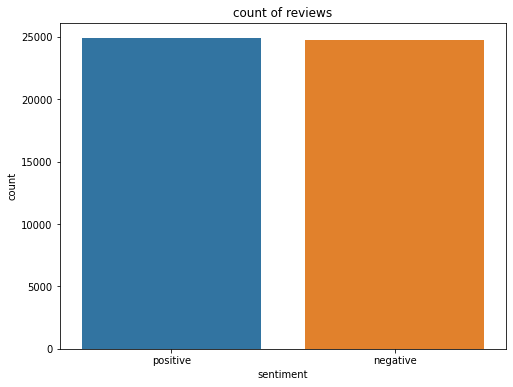

In [12]:
#creating a countplot to visualize reviews
plt.figure(figsize=(8,6))
sns.countplot(data.sentiment)
plt.title('count of reviews')
plt.show()


**3.2 : Count of positive/negative reviews**

In [13]:
data['sentiment'].value_counts()                    # count of positive,negative reviews

positive    24884
negative    24698
Name: sentiment, dtype: int64

**Remarks**
There is an almost equal share of positive and negative reviews,hence the target variable is fairly balanced.

**4.TEXT PROCESSING**

**4.1:Import preprocessing libraries**

In [62]:
import nltk                                    #natural language text processing
from nltk.tokenize import word_tokenize       # wordtokenization
from nltk.corpus import stopwords               #remove stopwords
from nltk.stem import WordNetLemmatizer         #lematization
nltk.download('omw-1.4')
from textblob import TextBlob                  #polarity scores
import re

**4.2 Create text processing function**

In [15]:
def cleaning(data,stop_words,lemmatizer):
    #converting review column to lower text
    data['review'] = data['review'].str.lower()
    #remove special characters
    data['review'] = data['review'].str.replace('[^\w\s]','')
    #remove breaks
    data['review'] = data['review'].str.replace('br','')
    #remove digits 
    data['review'] = data['review'].str.replace('\d','')
    #remove stopwords
    data['review'] = data['review'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop_words))
    #lematize
    data['review'] = data['review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(x) for x in x.split()]))
    return data

In [16]:
lemmatizer = WordNetLemmatizer()               #instantiate lemmatizer
stop_words = stopwords.words('english')        #stipulate stopwords

In [17]:
data = cleaning(data,stop_words,lemmatizer)  #run cleaning function

In [18]:
data.head()                            #confirm processing has been done

,review,sentiment
0,one reviewer mentioned watching oz episode you...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there family little boy jake think t...,negative
4,petter matteis love time money visually stunni...,positive


In [19]:
data1 = data.copy()                       #create a copy of cleaned df 

**5.Exploratory data annalysis**

**5.0:Import wordcloud for visualization**

In [20]:
#text visualization
from wordcloud import WordCloud                                                  #visualization
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

**5.1:Use word cloud to visualize  positive reviews**

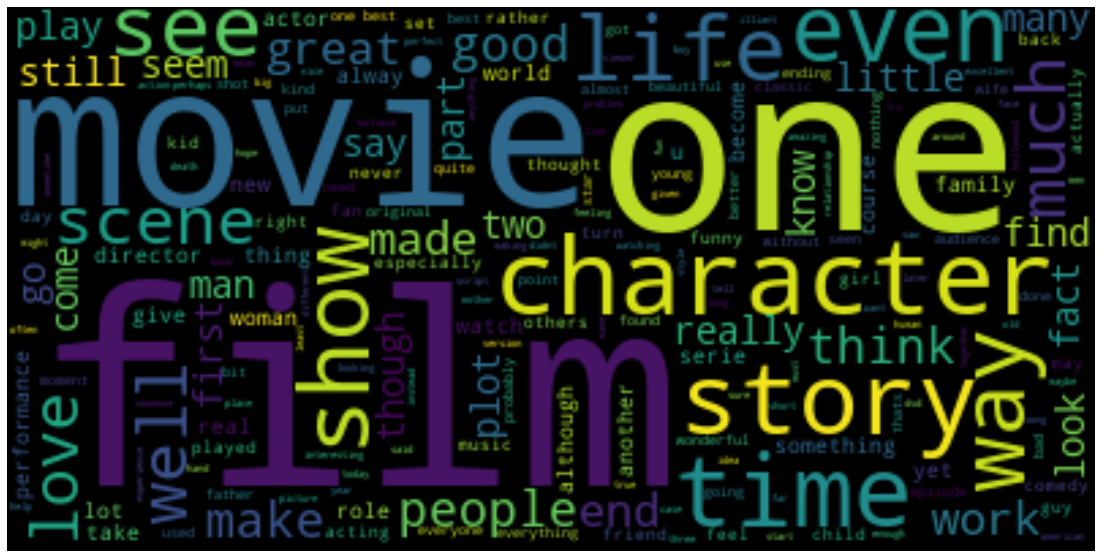

In [24]:
#i.subset dataframe for observations with positive reviews
review_positive = data[data["sentiment"] == 'positive']   

#ii.instantiate wordcloud for positive reviews only
wordcloud = WordCloud(stopwords = set(STOPWORDS)).generate(" ".join(i for i in review_positive.review))

#iii.Display image
plt.figure(figsize=(20,10))                                                
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**5.2:use word cloud to visualize negative reviews**

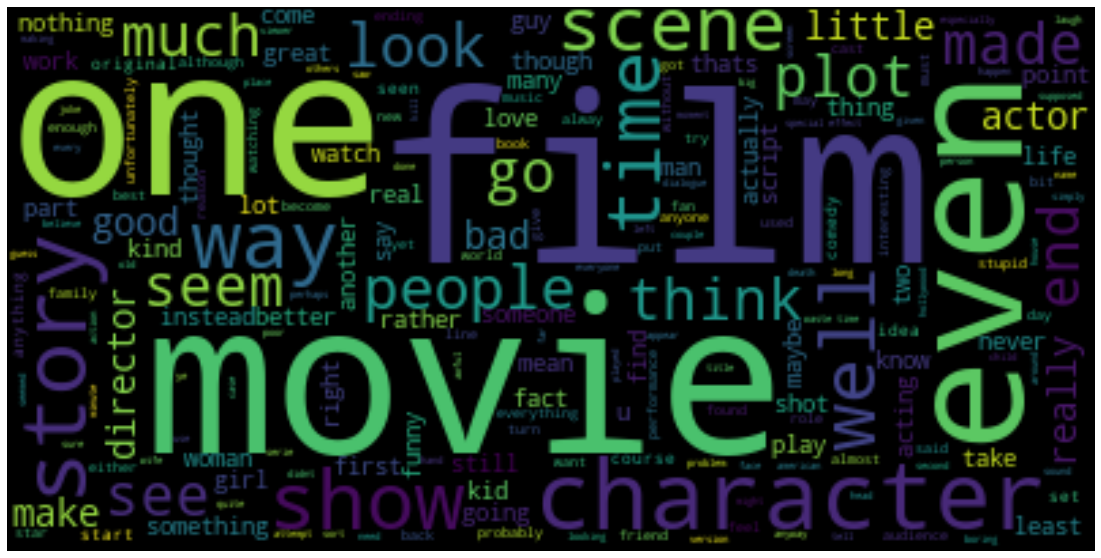

In [25]:
#i.subset dataframe for observations with negative reviews
review_negative = data[data["sentiment"] == 'negative']   

#ii.instantiate wordcloud for negative reviews only
wordcloud = WordCloud(stopwords = set(STOPWORDS)).generate(" ".join(i for i in review_negative.review))

#iii.Display image
plt.figure(figsize=(20,10))                                                
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**5.3 Distribution of word count,review length**

In [63]:
#creating three more columns : 
#i.review_len(length of review);
#ii.review_count(count of qwords in review)
#iii.polarity (measure of polarity score)

data['review_len'] = data['review'].astype(str).apply(len)
data['review_count'] = data['review'].apply(lambda x: len(str(x).split()))
data['polarity'] = data['review'].map(lambda text: TextBlob(text).sentiment.polarity)

In [64]:
data.head()

,review,sentiment,polarity
0,one reviewer mentioned watching oz episode you...,1,0.023881
1,wonderful little production filming technique ...,1,0.127604
2,thought wonderful way spend time hot summer we...,1,0.278571
3,basically there family little boy jake think t...,0,0.018056
4,petter matteis love time money visually stunni...,1,0.239534


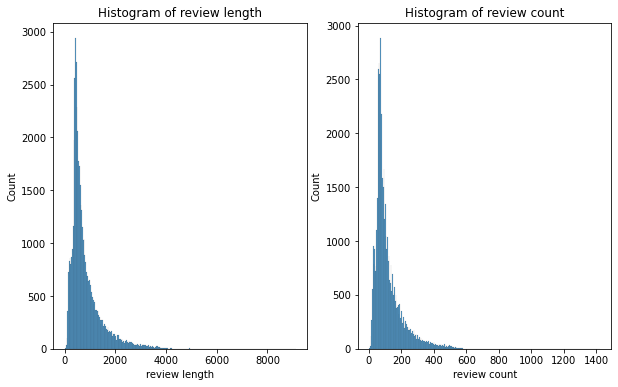

In [34]:
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.histplot(x ="review_len", data = data)
plt.xlabel("review length")
plt.title("Histogram of review length")
plt.subplot(122)
sns.histplot(x ="review_count", data = data)
plt.xlabel("review count")
plt.title("Histogram of review count")
plt.show()

**5.4 distribution of word count,length stratified by sentiment**

**i.pointplot : review length,wordcount vs sentiment**

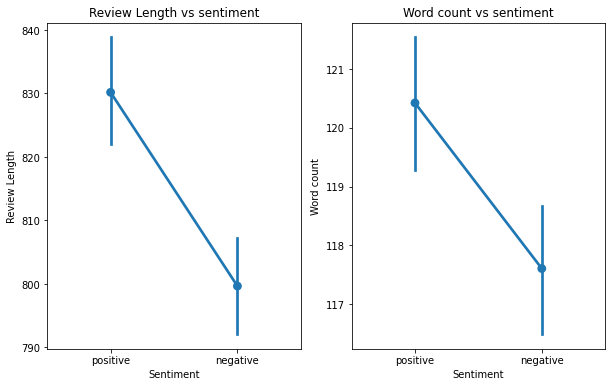

In [30]:
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.pointplot(x = "sentiment", y = "review_len", data = data)
plt.xlabel("Sentiment")
plt.ylabel("Review Length")
plt.title("Review Length vs sentiment")
plt.subplot(122)
sns.pointplot(x = "sentiment", y = "review_count", data = data)
plt.xlabel("Sentiment")
plt.ylabel("Word count")
plt.title("Word count vs sentiment")
plt.show()


**ii.displot: review length stratified by sentiment**

<Figure size 720x432 with 0 Axes>

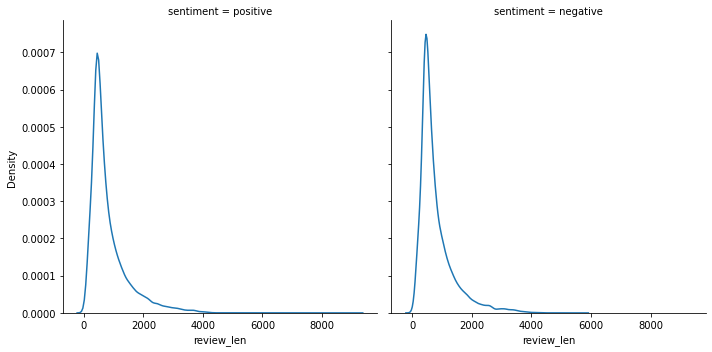

In [31]:
plt.figure(figsize=(10, 6))
sns.displot(x = "review_len",col='sentiment', data = data,kind='kde')
plt.show()

**iii.review count stratified by sentiment**

<Figure size 720x432 with 0 Axes>

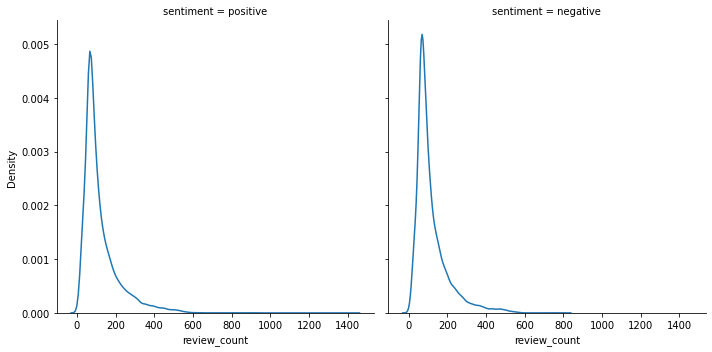

In [32]:
plt.figure(figsize=(10, 6))
sns.displot(x = "review_count",col= "sentiment", data = data,kind='kde')
plt.show()

**iv.Polarity score distribution**

<Figure size 720x432 with 0 Axes>

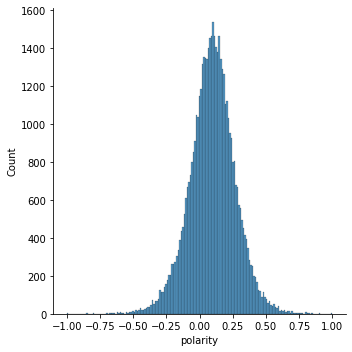

In [67]:
plt.figure(figsize=(10, 6))
sns.displot(x = "polarity",data = data)
plt.show()

**Remarks**
Disatisifed movie viewers spoke much less than satisified movie viewers.
There are quite a number of polarity scores less than zero demonstrating a significant number of negative reviews


**6.Sentiment Annalysis**

**6.1 LSTM**

In [ ]:
#1.Preprocessing
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
#2.Train test split
from sklearn.model_selection import train_test_split 
#3.Model implementation
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
#4.metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

**6.2 Text to numeric conversion**

In [22]:
word_tokenizer = Tokenizer(num_words=100, split=' ') 
word_tokenizer.fit_on_texts(data['review'].values)
X = word_tokenizer.texts_to_sequences(data['review'].values)
X = pad_sequences(X)

**6.3 Encode target variable**

In [24]:
#1.instantiate label encoder
le=LabelEncoder()
#2.Encode target variable i.e sentiment
data['sentiment'] = le.fit_transform(data['sentiment'])

**6.3 Text to numeric representation for review column**

In [42]:
word_tokenizer = Tokenizer(num_words=500, split=' ') 
word_tokenizer.fit_on_texts(data['review'].values)
X = word_tokenizer.texts_to_sequences(data['review'].values)
X = pad_sequences(X)

**6.4 Build model**

In [25]:
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

2022-12-30 17:15:39.411374: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-30 17:15:39.529400: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-30 17:15:39.530232: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-30 17:15:39.532107: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 251, 120)          60000     
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 251, 120)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 176)               209088    
_________________________________________________________________
dense (Dense)                (None, 2)                 354       
Total params: 269,442
Trainable params: 269,442
Non-trainable params: 0
_________________________________________________________________
None


**6.5 Train test split**

In [27]:
#Splitting the data into training and testing
y=pd.get_dummies(data['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5, random_state = 1,stratify=y)

**6.6 Fit model to data**

In [28]:
model.fit(X_train, y_train, epochs = 5, batch_size=64, verbose = 'auto')

2022-12-30 17:20:10.467643: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
388/388 [==============================] - 421s 1s/step - loss: 0.5660 - accuracy: 0.7026
Epoch 2/5
388/388 [==============================] - 421s 1s/step - loss: 0.5311 - accuracy: 0.7347
Epoch 3/5
388/388 [==============================] - 417s 1s/step - loss: 0.5270 - accuracy: 0.7407
Epoch 4/5
388/388 [==============================] - 416s 1s/step - loss: 0.5242 - accuracy: 0.7397
Epoch 5/5
388/388 [==============================] - 418s 1s/step - loss: 0.5208 - accuracy: 0.7431


****

**6.6 Evaluate performance on test data**

In [29]:
model.evaluate(X_test,y_test)

775/775 [==============================] - 46s 59ms/step - loss: 0.5202 - accuracy: 0.7414


[0.5202463865280151, 0.7414384484291077]

**7.Sentiment annalysis :Text Classification**

**7.1 creating a dataframe to work with for the classification task**

In [30]:
data_tc = data_copy 

**7.2 Importing libraries to perform text classification**

In [32]:
#i.Data preprocessing
from nltk.tokenize import RegexpTokenizer    
#2.Create bag of words
from sklearn.feature_extraction.text import CountVectorizer
#3.Model
from sklearn.naive_bayes import MultinomialNB

**7.3 clean the dataframe before classification**

In [36]:
#i.instantiate tokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
#ii.instantiate CountVectorizer
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
#Fit CountVectorizer  and tokenizer to dataframe column
review_counts= cv.fit_transform(data_tc['review'])

**7.4 Perform train text split**

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    review_counts, data_tc['sentiment'], test_size=0.5, random_state=1)

**7.5 Implementing text classification model**

In [53]:
MNB = MultinomialNB()                   #instantiate MNB classifier
MNB.fit(X_train, y_train)               #fit classifier to data
y_pred = MNB.predict(X_test)            #predict on test set
accuracy_score = accuracy_score(y_pred, y_test)  #accuracy evaluation
print(accuracy_score)                        #output accuracy score

0.85588


In [54]:
class_report=classification_report(y_pred,y_test,target_names=['Positive','Negative'])
print(class_report)

              precision    recall  f1-score   support

    Positive       0.88      0.84      0.86     13093
    Negative       0.83      0.87      0.85     11907

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



**Remarks:Text classification model performed better than LSTM model**

**END**